# DeltaSquare Logistic Regression

Description

Context:
DeltaSquare is an NGO that works with the Government on matters of social policy to bring about a change in the lives of underprivileged sections of society. They are tasked with coming up with a policy framework by looking at the data government got from WHO. You as a data scientist at DeltaSquare are tasked with solving this problem and sharing a proposal for the government.
 

Problem:
The dataset aims to answer the following key questions:

What are the different factors that influence the income of an individual?

Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?


Attribute Information:
The data Download datacontains characteristics of the people

age: continuous - age of a Person
workclass: Where do a person works - categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: This weight is assigned by the Current Population Survey (CPS). People with similar demographic characteristics should have similar weights since it is a feature aimed to allocate similar weights to people with similar demographic characteristics - continuous
education: Degree the person has - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: no. of years a person studied - continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: Investment gain of the person other than salary - continuous
capital-loss: Loss from investments - continuous
hours-per-week: No. of hours a person works - continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
salary: >50K, <=50K (dependent variable, the salary is in Dollars per year)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Loading the dataset
df = pd.read_csv("who_data.csv")

In [3]:
df.head(50)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Checking duplicates
df.duplicated().sum()

24

In [5]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [6]:
# Sanity check
df.duplicated().sum()

0

In [7]:
# Checking for missing values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [8]:
# Checking the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32537 non-null  int64 
 1   workclass               32537 non-null  object
 2   fnlwgt                  32537 non-null  int64 
 3   education               32537 non-null  object
 4   education_no_of_years   32537 non-null  int64 
 5   marital_status          32537 non-null  object
 6   occupation              32537 non-null  object
 7   relationship            32537 non-null  object
 8   race                    32537 non-null  object
 9   sex                     32537 non-null  object
 10  capital_gain            32537 non-null  int64 
 11  capital_loss            32537 non-null  int64 
 12  working_hours_per_week  32537 non-null  int64 
 13  native_country          32537 non-null  object
 14  salary                  32537 non-null  object
dtypes:

In [9]:
# Checking the unique values in the age feature
df["age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [10]:
# Checking the unique values in the age feature
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
df["workclass"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
# Removing the white spaces in the workclass feature
df["workclass"] = df["workclass"].str.strip()

In [13]:
# Sanity check
df["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
# Calculate the mode of the "workclass" feature
mode_value = df["workclass"].mode()[0]

In [15]:
# Replace the "?" values with the mode value
df["workclass"].replace("?", mode_value, inplace=True)

In [16]:
# Sanity Check
df["workclass"].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [18]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
# Removing the white spaces in the education feature
df["education"] = df["education"].str.strip()

In [20]:
# Sanity check
df["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [21]:
df["education"].value_counts(normalize = True)

HS-grad         0.322525
Some-college    0.223807
Bachelors       0.164520
Masters         0.052924
Assoc-voc       0.042475
11th            0.036113
Assoc-acdm      0.032793
10th            0.028675
7th-8th         0.019824
Prof-school     0.017703
9th             0.015797
12th            0.013308
Doctorate       0.012693
5th-6th         0.010204
1st-4th         0.005102
Preschool       0.001537
Name: education, dtype: float64

In [22]:
df["marital_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [23]:
# Removing the white spaces in the Marital Status feature
df["marital_status"] = df["marital_status"].str.strip()

In [24]:
# Sanity check
df["marital_status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [25]:
df["marital_status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [26]:
df["marital_status"].value_counts(normalize = True)

Married-civ-spouse       0.460092
Never-married            0.327842
Divorced                 0.136491
Separated                0.031503
Widowed                  0.030519
Married-spouse-absent    0.012847
Married-AF-spouse        0.000707
Name: marital_status, dtype: float64

In [27]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [28]:
# Removing the white spaces in the occupation feature
df["occupation"] = df["occupation"].str.strip()

In [29]:
df["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [30]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
# Replacing ? with "Unknown" in the occupation feature
df["occupation"].replace("?", "Unknown", inplace=True)

In [32]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [34]:
# Removing the white spaces in the relationship feature
df["relationship"] = df["relationship"].str.strip()

In [35]:
# Sanity check
df["relationship"].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [36]:
df["relationship"].value_counts(normalize = True)

Husband           0.405292
Not-in-family     0.254848
Own-child         0.155638
Unmarried         0.105879
Wife              0.048191
Other-relative    0.030150
Name: relationship, dtype: float64

In [37]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [38]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [39]:
# Removing the white spaces in the race feature
df["race"] = df["race"].str.strip()

In [40]:
# Sanity check
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [41]:
df["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [42]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [43]:
# Removing the white spaces in the sex feature
df["sex"] = df["sex"].str.strip()

In [44]:
# Sanity check
df["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
df["sex"].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [46]:
df["sex"].value_counts(normalize = True)

Male      0.669238
Female    0.330762
Name: sex, dtype: float64

In [47]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [48]:
df["native_country"].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [49]:
# Removing the white spaces in the native country feature
df["native_country"] = df["native_country"].str.strip()

In [50]:
# Sanity check
df["native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [51]:
# Calculate the mode of the "native_country" feature
mode_value_country = df["native_country"].mode()[0]

In [52]:
# Replace the "?" values with the mode value
df["native_country"].replace("?", mode_value_country, inplace=True)

In [53]:
df["native_country"].value_counts()

United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [54]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

In [55]:
df["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [56]:
# Removing the white spaces in the salary feature
df["salary"] = df["salary"].str.strip()

In [57]:
# Sanity check
df["salary"].unique()

array(['<=50K', '>50K'], dtype=object)

## Feature Engineering

### Mapping Countries to Regions

In [58]:
# Create a dictionary to map countries to regions
country_to_region = {
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    'Mexico': 'North America',
    'South': 'Unknown',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'China': 'Asia',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe'
}

# Create a new column 'region' based on the mapping
df['region'] = df['native_country'].map(country_to_region)

In [59]:
# Display the updated dataframe
df.head(50)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North America
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North America
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North America
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North America
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North America
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,North America
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,North America
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,North America
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,North America
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,North America


In [60]:
df["region"].value_counts()

North America    31147
Asia               671
Europe             521
South America      118
Unknown             80
Name: region, dtype: int64

### Creating Age Group feature from the age feature

In [61]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, np.inf], labels=['Young Adult', 'Middle-aged', 'Senior Citizen'])

In [62]:
df['age_group'].value_counts()

Middle-aged       15520
Young Adult       10558
Senior Citizen     6459
Name: age_group, dtype: int64

### Creating "Capital Change" feature from Capital Gain and Capital Loss

In [63]:
df['capital_change'] = df['capital_gain'] - df['capital_loss']

### Creating "Work Category" feature from "Hours per week"

In [65]:
# Working Hours Range
df['work_category'] = pd.cut(df['working_hours_per_week'], bins=[0, 20, 40, np.inf], labels=['Part-time', 'Full-time', 'Overtime'])

### Saving the refined data to a new CSV file

In [66]:
df.to_csv('clean_data.csv', index=False)

In [67]:
# Loading the cleaned dataset
clean_df = pd.read_csv("clean_data.csv")

In [68]:
# Checking the descriptive statistics
clean_df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,capital_change
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,991.075514
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,7411.670204
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


<Figure size 768x576 with 0 Axes>

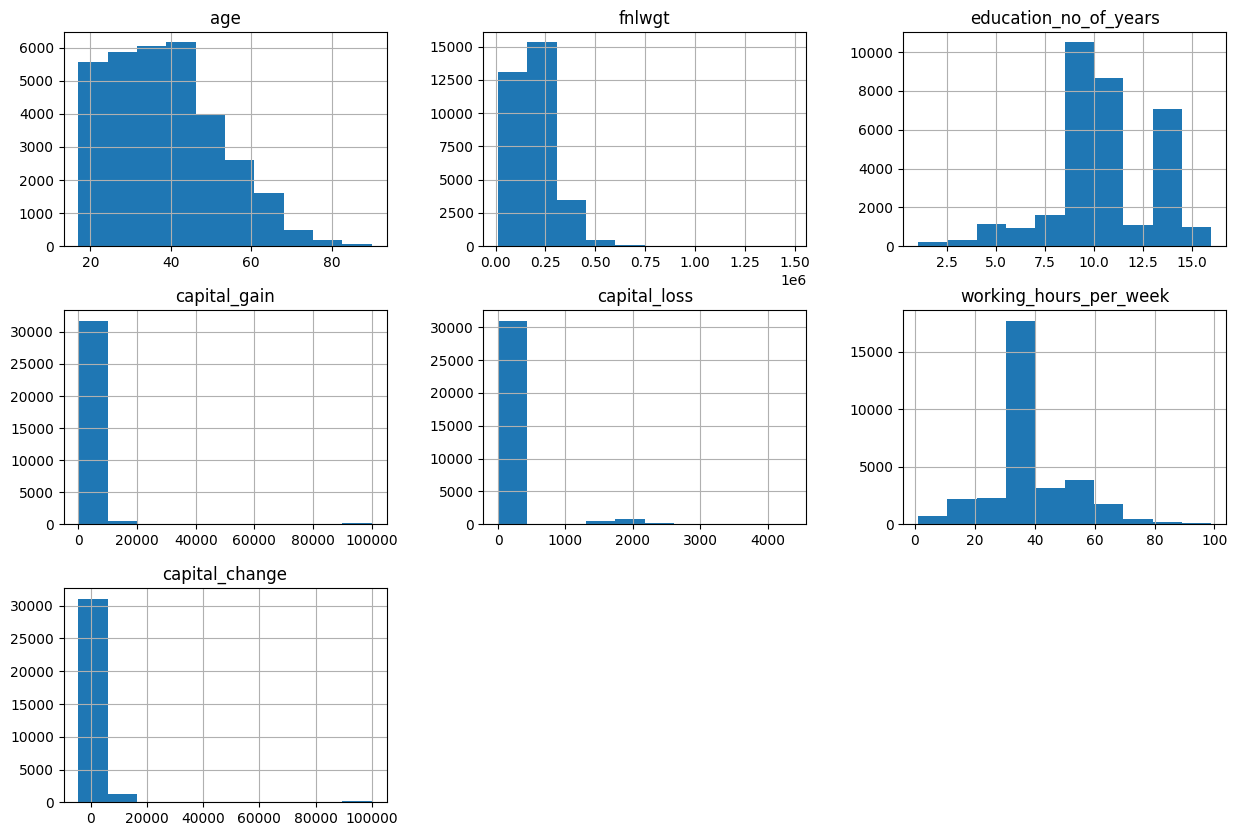

In [69]:
# Checking the dsitribution
plt.figure(dpi = 120);
clean_df.hist(figsize = (15, 10));
plt.show();

### View Categorical Features

In [70]:
# Getting all the categorical columns
df_object = clean_df.select_dtypes(include = "object")
df_object

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary,region,age_group,work_category
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,North America,Middle-aged,Full-time
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,North America,Middle-aged,Part-time
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,North America,Middle-aged,Full-time
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,North America,Senior Citizen,Full-time
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,North America,Young Adult,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...
32532,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,North America,Young Adult,Full-time
32533,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,North America,Middle-aged,Full-time
32534,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,North America,Senior Citizen,Full-time
32535,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,North America,Young Adult,Part-time


In [71]:
label_encoder = LabelEncoder()
clean_df["salary"] = label_encoder.fit_transform(clean_df["salary"])

### View Numerical Features

In [72]:
# Extracting all the numerical data
df_numerical = clean_df.select_dtypes(exclude = "object")
df_numerical

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,salary,capital_change
0,39,77516,13,2174,0,40,0,2174
1,50,83311,13,0,0,13,0,0
2,38,215646,9,0,0,40,0,0
3,53,234721,7,0,0,40,0,0
4,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...
32532,27,257302,12,0,0,38,0,0
32533,40,154374,9,0,0,40,1,0
32534,58,151910,9,0,0,40,0,0
32535,22,201490,9,0,0,20,0,0


### Checking for relevant categorical features as predictor variables using Chi-Square

In [73]:
# Defining the categorical columns I want to test
cat_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "region", "age_group", "work_category"]

for col in cat_cols:
    contingency_table = pd.crosstab(clean_df[col], clean_df['salary'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f'{col}: p-value = {p_val}')

workclass: p-value = 7.156800770833626e-195
education: p-value = 0.0
marital_status: p-value = 0.0
occupation: p-value = 0.0
relationship: p-value = 0.0
race: p-value = 2.2797874171824478e-70
sex: p-value = 0.0
native_country: p-value = 1.7625237545277189e-44
region: p-value = 6.923283861264698e-09
age_group: p-value = 0.0
work_category: p-value = 0.0


C:\Users\SPESSE ENVIROMENT\AppData\Local\Temp\ipykernel_30856\1293124363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_df.corr()


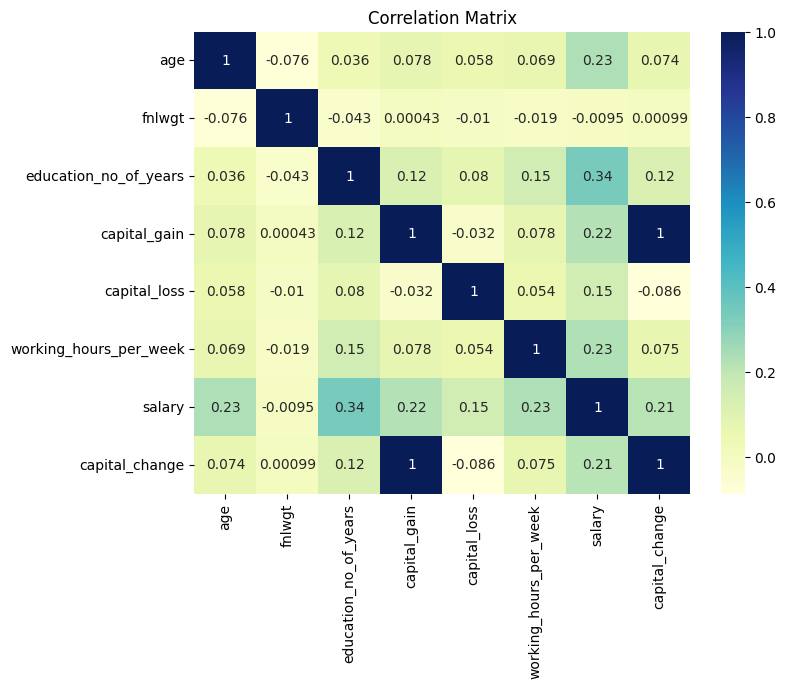

In [74]:
# Correlation matrix
correlation_matrix = clean_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

- It's evident from the heatmap above that there is a weak correlation between the numerical variables and the dependent variable.

### Preparing the data

In [75]:
clean_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary', 'region', 'age_group', 'capital_change',
       'work_category'],
      dtype='object')

In [76]:
features = ['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'region', 'age_group', 'capital_change',
       'work_category']
target = 'salary'
X = clean_df[features]
y = clean_df[target]

In [77]:
# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X)

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [79]:
# Create a pipeline with feature scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [80]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [81]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [82]:
# Model Performance Assessment
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8560233558696988
Precision: 0.7477678571428571
Recall: 0.6269494697442296
F1-Score: 0.682049541907024


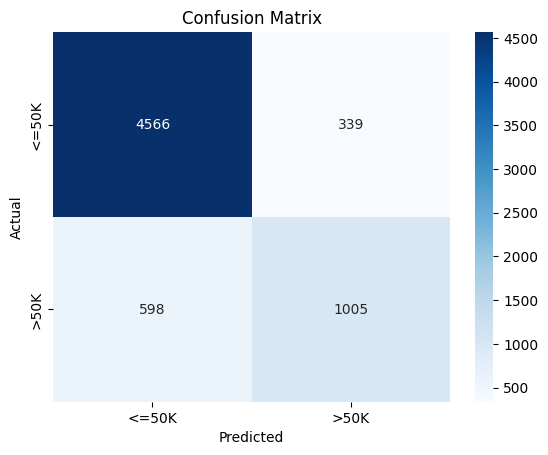

In [83]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["<=50K", ">50K"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()